<p>Solutions to the <a href=https://ocw.mit.edu/courses/materials-science-and-engineering/3-11-mechanics-of-materials-fall-1999/modules/MIT3_11F99_composites.pdf>Introduction to Composite Materials</a> module of MIT's Open Course <b>Mechanics of Materials</b>.</br>
Other material properties listed <a href=https://ocw.mit.edu/courses/materials-science-and-engineering/3-11-mechanics-of-materials-fall-1999/modules/MIT3_11F99_props.pdf>here</a>.</br>
</br>
David Roylance. 3.11 Mechanics of Materials. Fall 1999. Massachusetts Institute of Technology: MIT OpenCourseWare, https://ocw.mit.edu. License: Creative Commons BY-NC-SA.</p>

In [9]:
import numpy as np
import sympy as sp
from sympy import init_printing
init_printing(use_latex=True)
import matplotlib.pyplot as plt

<p>For problem #1, the longitudinal and transverse stiffnesses are calculated using the equations from the slab model.
<div align=center>$E_1 = V_f*E_f + V_m*E_m$</div>
<div align=center>$\frac{1}{E_2} = \frac{V_f}{E_f} + \frac{V_m}{E_m}$</div></p>

In [5]:
# Problem 1
# for S-glass fibers
Ef = 85.5  # GPa
Vf = 0.7

# for the epoxy
Em = 3.5  # GPa
Vm = 1 - Vf

# from the slab model, the composite stiffnesses are
E1 = Vf*Ef + Vm*Em
E2 = 1/(Vf/Ef + Vm/Em)

print(f"The longitudinal stiffness: E1 = {E1:.1f} GPa")
print(f"The transverse stiffness: E2 = {E2:.1f} GPa")

The longitudinal stiffness: E1 = 60.9 GPa
The transverse stiffness: E2 = 10.6 GPa


<p>In problem #2, the longitudinal stiffness of an E-glass nylon composite is plotted over a range of fiber volumes, $V_f$.

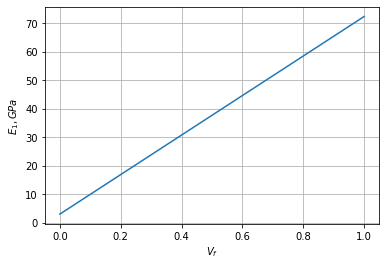

In [17]:
# Problem 2
# for E-glass fibers
Ef = 72.4  # GPa
# for the nylon
Em = 3.0  # GPa

Vf = np.linspace(0, 1, 100, endpoint=True)
Vm = 1 - Vf
E1 = Vf*Ef + Vm*Em

plt.plot(Vf, E1)
plt.xlabel(r"$V_f$")
plt.ylabel(r"$E_1, GPa$")
plt.grid(True)
plt.show()

<p>In problem #3, the longitudinal breaking tensile stress of an E-glass epoxy composite is plotted over a range of fiber volumes, $V_f$. Breaking stress is determined mostly by the fiber strength. Using the fiber breaking strain and composite stiffness we have:</br>
<div align=center>$\sigma_b = \epsilon_{fb}*E_1 = \epsilon_{fb}*(V_f*E_f + V_m*E_m)$</div></br>
At low fiber volumes its possible for the fibers to break and the matrix to hold the entire load, so the breaking stress in this region is descibed as:</br>
<div align=center>$\sigma_b = V_m*\sigma_{mb}$</div></br>

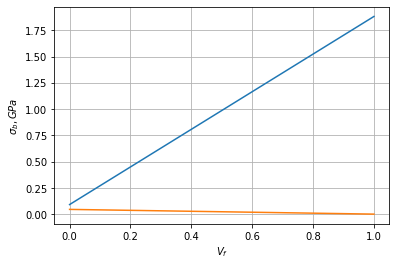

In [27]:
# Problem 3
# for E-glass fibers
Ef = 72.4  # GPa
sigma_fb = 2.4  # Gpa, fiber breaking stress
epsilon_fb = 0.026  # breaking strain of the fiber

# for the epoxy
Em = 3.5  # GPa
sigma_mb = 0.045  # Gpa, matrix breaking stress
epsilon_mb = 0.04  # breaking strain of the matrix

Vf = np.linspace(0, 1, 100, endpoint=True)
Vm = 1 - Vf
E1 = Vf*Ef + Vm*Em
sigma1 = epsilon_fb*E1
sigma2 = Vm*sigma_mb
sigma = [max(s1, s2) for s1, s2 in zip(sigma1, sigma2)]

plt.plot(Vf, sigma1)
plt.plot(Vf, sigma2)
plt.xlabel(r"$V_f$")
plt.ylabel(r"$\sigma_b, GPa$")
plt.grid(True)
plt.show()

<p>After plotting both breaking stress equations, it is cleat the breaking stress is only determined by the first equation.</p>

<p>Problem #4 asks for the greatest fiber packing volume fraction given optimal fiber packing. And assuming that the optimal packing is <a href=https://en.wikipedia.org/wiki/Fiber_volume_ratio#Common_Fiber_Packing_Arrangements>hexagonal packing</a>, the fiber volume fraction is determined with the following equation:</br>
<div align=center>$V_f = \left(\frac{\pi}{2\sqrt{3}}\right)*\left(\frac{r}{R}\right)^2$</div>
Where $r$ is the fiber radius and $2*R$ is the spacing between fiber centers, which in an optimal pattern: $2*R = 2*r$ and the last term drops out of the equation.

In [29]:
#Problem 4
Vf = (np.pi/(2*np.sqrt(3)))
print(f"The max fiber volume fraction = {Vf:.3f}")

The max fiber volume fraction = 0.907


<p>Problem #5 asks to show how the slab model is used to calculate the transverse stiffness of the composite: $\frac{1}{E_2} = \frac{Vf}{E_f} + \frac{V_m}{E_m}$</br>
Some assumptions need to be made to reach this equation: first, the stress in the fiber and matrix are the same; and second, the deformation of the slab in the transverse direction is the sum of the fiber and matrix deformations:</br>
<div align=center>$\epsilon_2*1 = \epsilon_f*V_f + \epsilon_m*V_m$</div></br>
Deformation is $strain*length$, and length in the transverse direction of a unit slab is 1, and lengths for the fiber and matrix are equal to their volume fraction. See Figure 3 from the composites module, shown below, for how the the volume fractions add up to the unit length, $V_f + V_m = 1$.</br>
<img align=center src="figure3_TransverseLoadingSlab.png" width=300 height=300 /></br>
The stress-strain relationship $\epsilon = \frac{\sigma}{E}$ is substituted into the equation, resulting in:
<div align=center>$\frac{\sigma_2}{E_2}*1 = \frac{\sigma_f}{E_f}*V_f + \frac{\sigma_m}{E_m}*V_m$</div></br>
The first assumption that fiber and matrix stresses are equal to the composite transverse stress, $\sigma_2 = \sigma_f = \sigma_m$, allow for all the $\sigma$ terms to cancel out, resulting in the transverse stiffness equation.
<div align=center>$\frac{1}{E_2} = \frac{Vf}{E_f} + \frac{V_m}{E_m}$</div></br>
</p>
